In [45]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_exp_ratings = pd.read_csv('Data/explicit_ratings_en.csv') # Явные оценки пользователей (1-10), % просмотра
df_imp_ratings = pd.read_csv('Data/implicit_ratings_en.csv') # Не явные оценки, время просмотра страницы с видосиком
df_users = pd.read_csv('Data/users_en.csv') # Информация о пользователе
df_items = pd.read_csv('Data/items_en.csv') # Информация о курсах

In [8]:
df_exp_ratings.head()

,user_id,item_id,watch_percentage,created_at,rating
0,224557,510,100,2018-09-28 16:18:29,10
1,224557,615,100,2018-09-28 16:22:22,10
2,224557,7680,100,2018-09-28 16:23:34,10
3,224293,510,100,2018-09-28 17:20:30,10
4,224293,515,100,2018-09-28 17:40:02,10


In [31]:
len(df_exp_ratings)

3659

`item_id` - Идентификтор курса <br/>
`user_id` - Идентификатор пользователя <br/>
`watch_percentage` - Процент прохождения курса пользователем <br/>
`created_at` - дата и время (видимо, занесения данных в базу, т.е. оценки курса)<br/>
`rating` - Оценка курса пользователем по шкале от 1 до 10

In [9]:
df_imp_ratings.head()

,item_id,user_id,created_at
0,510,4287,2016-11-02 20:59:23
1,510,4287,2017-06-20 00:33:46
2,511,4287,2017-06-20 00:44:42
3,512,4287,2017-06-20 00:52:11
4,513,4287,2017-06-20 00:54:41


In [11]:
df_users.head(5)

,user_id,job
0,384,NaN
1,421,NaN
2,530,NaN
3,672,NaN
4,752,NaN


`user_id` - Идентификатор пользователя <br/>
`job` - Работа, указанная пользователем

In [12]:
df_items.head(5)

,item_id,language,name,nb_views,description,created_at,Difficulty,Job,Software,Theme,duration,type
0,510,en,What is OneDrive for Business?,1114.0,OneDrive for Businessis an online libraryto st...,2016,Beginner,[],['OneDrive'],['Discover'],42.0,tutorial
1,511,en,"Add, restore, delete documents on OneDrive",547.0,"To create a new document in OneDriveclick New,...",2016,Beginner,[],['OneDrive'],"['Share', 'Produce', 'Organize']",122.0,tutorial
2,512,en,Share documents,607.0,"By default, all content is private, so you don...",2016,Beginner,[],['OneDrive'],"['Share', 'Collaborate']",176.0,tutorial
3,513,en,Recycle bin,278.0,"When you delete a file or afolder, OneDrive gi...",2016,Beginner,"['Accounting', 'Financial', 'Human resources',...",['OneDrive'],"['Produce', 'Organize']",46.0,tutorial
4,514,en,Sync OneDrive for Business to your computer (W...,312.0,The one drive synchronization application is a...,2016,Beginner,[],['OneDrive'],"['Produce', 'Organize']",163.0,tutorial


In [29]:
df_items.nunique()

item_id        1167
language          1
name           1130
nb_views        223
description    1009
created_at        6
Difficulty        3
Job              43
Software         62
Theme            63
duration        316
type              3
dtype: int64

`item_id` - Идентификтор курса <br/>
`language` - Язык курса (в данном случае - английский) <br/>
`name` - Название <br/>
`nb_views` - Количество просмотров курса <br/>
`description` - Описание содержания <br/>
`created_at` - Год создания курса <br/>
`Difficulty` - Уровень сложности (`Beginner`, `Intermediate`, `Advanced`, `nan`) <br/>
`Job` - Список сфер деятельности, для которых курс сделан <br/>
`Software` - ПО (видимо, которое нужно для прохождения курса) <br/>
`Theme` - тема курса (не связана с проф. навыками) <br/>
`Duration` - Продолжительность курса в секундах (курс - это почти всегда одно короткое видео, как оказалось) <br/>
`Type` - Тип курса (`Tutorial`, `webcast`, `use_case`)

In [24]:
df_items[df_items['Job'] == '[]']['item_id'].count() / df_items['item_id'].count()

np.float64(0.7446443873179092)

In [26]:
df_items[df_items['Software'] == '[]']['item_id'].count() / df_items['item_id'].count()

np.float64(0.05312767780634105)

In [25]:
df_items[df_items['Theme'] == '[]']['item_id'].count() / df_items['item_id'].count()

np.float64(0.2544987146529563)

**Вывод:** <br>
- *Job* слишком много пропущенных значений - использовать в качестве параметра не получится
- *Software* попробуем
- *Theme* ну нормально так пропусков. Не будем использовать в качестве параметра

# 1. Оценка рейтингов

In [142]:
df_rating_of_cours = pd.merge(df_exp_ratings, df_items, on=['item_id'], how='inner')
df_rating_of_cours['Software'] = df_rating_of_cours['Software'].apply(lambda x: x[1:-1].split(','))
df_rating_of_cours['Max'] = df_rating_of_cours['Software'].apply(lambda x: len(x))
df_rating_of_cours[df_rating_of_cours['Max'] > 2]

,user_id,item_id,watch_percentage,created_at_x,rating,language,name,nb_views,description,created_at_y,Difficulty,Job,Software,Theme,duration,type,Max
53,277945,4422,33,2019-08-21 21:59:00,4,en,Creating a group,92.0,Creating a group and I would Welcome to this t...,2017,Beginner,"['Human resources', 'Assistant']","['Outlook Online', 'Outlook', 'Groups']","['Collaborate', 'Communicate']",158.0,tutorial,3
107,277945,126663,100,2019-10-21 13:55:32,10,en,Microsoft Search,111.0,NaN,2019,NaN,[],"['Word', 'Excel', 'PowerPoint']",['New features'],34.0,tutorial,3
345,322302,4423,100,2019-05-07 20:43:38,10,en,Having a conversation within a group,83.0,Having a conversation within a group hello and...,2017,Beginner,"['Human resources', 'Assistant']","['Outlook Online', 'Outlook', 'Groups']","['Collaborate', 'Communicate']",201.0,tutorial,3
857,537825,126663,100,2020-07-18 19:30:16,10,en,Microsoft Search,111.0,NaN,2019,NaN,[],"['Word', 'Excel', 'PowerPoint']",['New features'],34.0,tutorial,3
898,545083,1935,100,2020-08-27 12:24:32,10,en,Organise meetings for new projects,323.0,"As part of your mandate as project manager,you...",2017,Beginner,"['Project manager', 'Project management']","['Skype for Business', 'Outlook', 'Project O...",['Organize'],168.0,use_case,3
959,566748,126663,100,2021-05-05 19:25:58,10,en,Microsoft Search,111.0,NaN,2019,NaN,[],"['Word', 'Excel', 'PowerPoint']",['New features'],34.0,tutorial,3
1042,580934,1927,100,2021-03-02 14:50:29,10,en,Prepare big events,103.0,Your role as Marketing Managerrequires that yo...,2017,Beginner,"['Communication', 'Marketing']","['Yammer', 'PowerPoint', 'OneNote']","['Organize', 'Analyze']",197.0,use_case,3
1078,544668,126663,100,2020-07-21 23:45:02,10,en,Microsoft Search,111.0,NaN,2019,NaN,[],"['Word', 'Excel', 'PowerPoint']",['New features'],34.0,tutorial,3
1182,545551,4422,61,2020-08-03 14:51:23,7,en,Creating a group,92.0,Creating a group and I would Welcome to this t...,2017,Beginner,"['Human resources', 'Assistant']","['Outlook Online', 'Outlook', 'Groups']","['Collaborate', 'Communicate']",158.0,tutorial,3
1500,130811,300236,75,2020-07-31 17:31:57,8,en,"Do I share with OneDrive, SharePoint, or TEAMS?",155.0,The Office 365 suite offers a varietyof collab...,2020,NaN,[],"['OneDrive', 'SharePoint (Classic Sites)', '...","['Collaborate', 'Security']",144.0,tutorial,3


In [259]:
df_items

,item_id,language,name,nb_views,description,created_at,Difficulty,Job,Software,Theme,duration,type
0,510,en,What is OneDrive for Business?,1114.0,OneDrive for Businessis an online libraryto st...,2016,Beginner,[],['OneDrive'],['Discover'],42.0,tutorial
1,511,en,"Add, restore, delete documents on OneDrive",547.0,"To create a new document in OneDriveclick New,...",2016,Beginner,[],['OneDrive'],"['Share', 'Produce', 'Organize']",122.0,tutorial
2,512,en,Share documents,607.0,"By default, all content is private, so you don...",2016,Beginner,[],['OneDrive'],"['Share', 'Collaborate']",176.0,tutorial
3,513,en,Recycle bin,278.0,"When you delete a file or afolder, OneDrive gi...",2016,Beginner,"['Accounting', 'Financial', 'Human resources',...",['OneDrive'],"['Produce', 'Organize']",46.0,tutorial
4,514,en,Sync OneDrive for Business to your computer (W...,312.0,The one drive synchronization application is a...,2016,Beginner,[],['OneDrive'],"['Produce', 'Organize']",163.0,tutorial
...,...,...,...,...,...,...,...,...,...,...,...,...
1162,422593,en,Create custom fields,22.0,NaN,2021,NaN,[],['Bookings'],"['Produce', 'Customize']",81.0,tutorial
1163,422594,en,Make a reservation [Customer],22.0,NaN,2021,NaN,[],['Bookings'],['Produce'],133.0,tutorial
1164,422595,en,Make a reservation [Staff],19.0,NaN,2021,NaN,[],['Bookings'],['Produce'],115.0,tutorial
1165,422596,en,Manage your availabilities,19.0,NaN,2021,NaN,[],['Bookings'],['Organize'],102.0,tutorial


# 2. То с чем ебался часа 3-4 ДАММИ-ПЕРЕМЕННЫЕ

In [278]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

df_rating = df_items.copy()
df_rating['Software'] = df_items['Software'].apply(lambda x: x[1:-1].split(','))

theme_dummies = pd.DataFrame(
    mlb.fit_transform(df_rating['Software']),
    columns=mlb.classes_,
    index=df_rating.index  # Важно: чтобы сохранить выравнивание по строкам
)

df_final = df_rating.drop(columns='Software').join(theme_dummies)
                                         
# df_rating = df_rating.explode('Software')
# df_cnct = pd.concat([df_rating.drop(columns='Software'), pd.get_dummies(df_rating['Software'], dtype='int')], axis=1)
# df_cnct = df_cnct.groupby(df_rating.drop(columns='Software').columns.to_list()).agg('sum').reset_index(drop=False)

df_final


,item_id,language,name,nb_views,description,created_at,Difficulty,Job,Theme,duration,...,'Skype VS Teams','Skype Voice & Devices','Skype for Business','StaffHub','Stream','Sway','To Do','Windows 10','Word','Yammer'
0,510,en,What is OneDrive for Business?,1114.0,OneDrive for Businessis an online libraryto st...,2016,Beginner,[],['Discover'],42.0,...,0,0,0,0,0,0,0,0,0,0
1,511,en,"Add, restore, delete documents on OneDrive",547.0,"To create a new document in OneDriveclick New,...",2016,Beginner,[],"['Share', 'Produce', 'Organize']",122.0,...,0,0,0,0,0,0,0,0,0,0
2,512,en,Share documents,607.0,"By default, all content is private, so you don...",2016,Beginner,[],"['Share', 'Collaborate']",176.0,...,0,0,0,0,0,0,0,0,0,0
3,513,en,Recycle bin,278.0,"When you delete a file or afolder, OneDrive gi...",2016,Beginner,"['Accounting', 'Financial', 'Human resources',...","['Produce', 'Organize']",46.0,...,0,0,0,0,0,0,0,0,0,0
4,514,en,Sync OneDrive for Business to your computer (W...,312.0,The one drive synchronization application is a...,2016,Beginner,[],"['Produce', 'Organize']",163.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,422593,en,Create custom fields,22.0,NaN,2021,NaN,[],"['Produce', 'Customize']",81.0,...,0,0,0,0,0,0,0,0,0,0
1163,422594,en,Make a reservation [Customer],22.0,NaN,2021,NaN,[],['Produce'],133.0,...,0,0,0,0,0,0,0,0,0,0
1164,422595,en,Make a reservation [Staff],19.0,NaN,2021,NaN,[],['Produce'],115.0,...,0,0,0,0,0,0,0,0,0,0
1165,422596,en,Manage your availabilities,19.0,NaN,2021,NaN,[],['Organize'],102.0,...,0,0,0,0,0,0,0,0,0,0


In [279]:
df_final[df_final['item_id'] == 300236]

,item_id,language,name,nb_views,description,created_at,Difficulty,Job,Theme,duration,...,'Skype VS Teams','Skype Voice & Devices','Skype for Business','StaffHub','Stream','Sway','To Do','Windows 10','Word','Yammer'
962,300236,en,"Do I share with OneDrive, SharePoint, or TEAMS?",155.0,The Office 365 suite offers a varietyof collab...,2020,NaN,[],"['Collaborate', 'Security']",144.0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Удельный вес оценок')

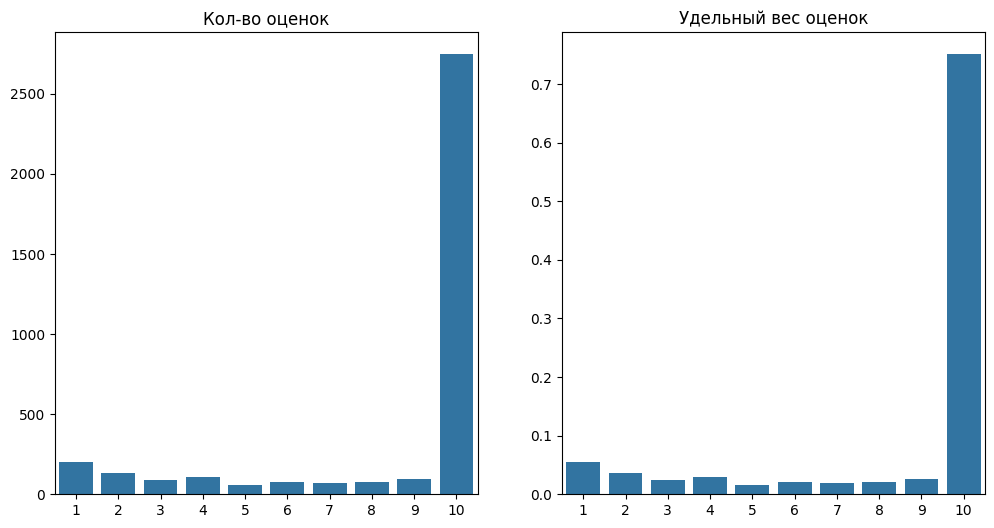

In [79]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
sns.barplot(x=df_rating_of_cours['rating'].value_counts().index.to_list(), y=df_rating_of_cours['rating'].value_counts().values, ax=axes[0])
sns.barplot(x=df_rating_of_cours['rating'].value_counts(normalize=True).index.to_list(), y=df_rating_of_cours['rating'].value_counts(normalize=True).values, ax=axes[1])

axes[0].set_title('Кол-во оценок')
axes[1].set_title('Удельный вес оценок')

**Вывод:** 

In [92]:
df_exp_ratings['user_id'].value_counts()

user_id
604039    134
537825    127
277945    101
295494     67
284287     64
         ... 
294411      1
549323      1
604374      1
479076      1
506031      1
Name: count, Length: 822, dtype: int64

**Кол-во пользователей, у которых больше или равно 4 оценок**

In [113]:
len(df_exp_ratings['user_id'].value_counts()[df_exp_ratings['user_id'].value_counts() >= 4]) / len(df_exp_ratings['user_id'].value_counts())


0.2542579075425791

In [115]:
df_rating_of_cours['type'].value_counts(normalize=True)

type
tutorial    0.935502
use_case    0.042361
webcast     0.022137
Name: proportion, dtype: float64